# Generate KLB-1 phase diagram from Holland et al. (2018)
## Part 2 : Import MAGEMin output

**This notebook must be run with python**

In [1]:
import pyMelt as m
from pyMelt import phaseDiagramTools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
results = pd.read_csv('table_klb1_holland2018.csv')
results.head()

,P,T,spn_wtpt_O,spn,spn_wtpt_FeO,opx,heat_capacity,cpx_cbuf,ol_wtpt_H2O,cpx_cfs,...,g_tig,g_gr,g_alm,g,g_wtpt_H2O,g_wtpt_FeO,g_wtpt_O,g_wtpt_SiO2,g_wtpt_Na2O,g_knom
0,0.01,1100.000000,0.880645,0.000838,21.232484,0.179617,0.214807,0.024430,0.0,0.057052,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.01,1105.025126,0.871742,0.000807,21.123468,0.179789,0.215532,0.024864,0.0,0.057187,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.01,1110.050251,0.862899,0.000776,21.024771,0.179960,0.215749,0.025307,0.0,0.057360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.01,1115.075377,0.854287,0.000745,20.920343,0.180127,0.215282,0.025759,0.0,0.057503,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.01,1120.100503,0.845819,0.000713,20.818217,0.180291,0.215793,0.026221,0.0,0.057650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Format the data table

Replace thermocalc phase nomenclature with pyMelt nomenclature:

In [3]:
for col in results.columns:
    if col.split('_')[0] == 'ol':
        # print('olv'+col[2:])
        results['olv'+col[2:]] = results[col]
        results.drop(col, axis=1, inplace=True)
    elif col.split('_')[0] == 'g':
        results['grt'+col[1:]] = results[col]
        results.drop(col, axis=1, inplace=True)
    elif col.split('_')[0] == 'fsp':
        results['plg'+col[3:]] = results[col]
        results.drop(col, axis=1, inplace=True)

Remove H2O (which should all be 0):

In [4]:
for col in results.columns:
    if col.split('_')[-1] == 'H2O':
        results.drop(col, axis=1, inplace=True)

Replace O with Fe2O3:

In [5]:
for col in results.columns:
    cs = col.split('_')
    if cs[-1] == 'O':
        results[cs[0] + '_wtpt_FeO'] = (results[cs[0] + '_wtpt_FeO'] / 71.844 - results[cs[0] + '_wtpt_O'] / 15.999 * 2) * 71.844
        results[cs[0] + '_wtpt_Fe2O3'] = results[cs[0] + '_wtpt_O'] / 15.999 * 159.69
        results.drop(col, axis=1, inplace=True)


Relabel temperature and pressure:

In [6]:
results['temperature'] = results['T']
results.drop('T', axis=1, inplace=True)
results['pressure'] = results['P']
results.drop('P', axis=1, inplace=True)

Reorder wtpt labels:

In [7]:
for col in results.columns:
    cs = col.split('_')
    if len(cs) > 1 and cs[1] == 'wtpt':
        results[cs[0] + '_' + cs[2] + '_wtpt'] = results[col]
        results.drop(col, axis=1, inplace=True)

In [8]:
for col in results.columns:
    if col in ['olv', 'cpx', 'opx', 'grt', 'spn', 'plg', 'liq']:
        results[col + '_mass'] = results[col]
        results.drop(col, axis=1, inplace=True)

### Import into pyMelt

In [9]:
grid = phaseDiagramTools.gridsMAGEMin(results)

In [10]:
phasediagram = phaseDiagramTools.phaseDiagram(grid, minerals=['olv', 'cpx', 'opx', 'grt', 'spn', 'plg'])

/Users/sm905/repos/pyMelt/pyMelt/phaseDiagramTools.py:167: RuntimeWarning: invalid value encountered in double_scalars
  y.loc[last_finite_ind + 1] = y.loc[last_finite_ind] + dydx*(x.loc[last_finite_ind + 1] - x.loc[last_finite_ind]) * dfdi_multiplier
/Users/sm905/repos/pyMelt/pyMelt/phaseDiagramTools.py:167: RuntimeWarning: invalid value encountered in double_scalars
  y.loc[last_finite_ind + 1] = y.loc[last_finite_ind] + dydx*(x.loc[last_finite_ind + 1] - x.loc[last_finite_ind]) * dfdi_multiplier
/Users/sm905/repos/pyMelt/pyMelt/phaseDiagramTools.py:167: RuntimeWarning: invalid value encountered in double_scalars
  y.loc[last_finite_ind + 1] = y.loc[last_finite_ind] + dydx*(x.loc[last_finite_ind + 1] - x.loc[last_finite_ind]) * dfdi_multiplier
/Users/sm905/repos/pyMelt/pyMelt/phaseDiagramTools.py:167: RuntimeWarning: invalid value encountered in double_scalars
  y.loc[last_finite_ind + 1] = y.loc[last_finite_ind] + dydx*(x.loc[last_finite_ind + 1] - x.loc[last_finite_ind]) * dfdi_mul

In [11]:
f = open( "klb1_holland2018.p", "wb" )
pickle.dump(phasediagram, f)
f.close()

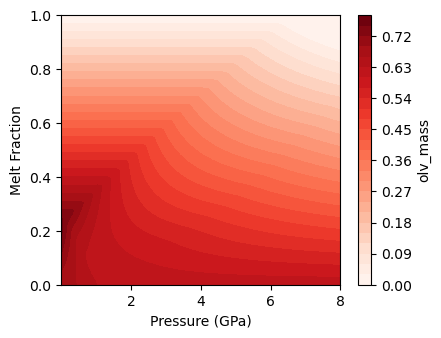

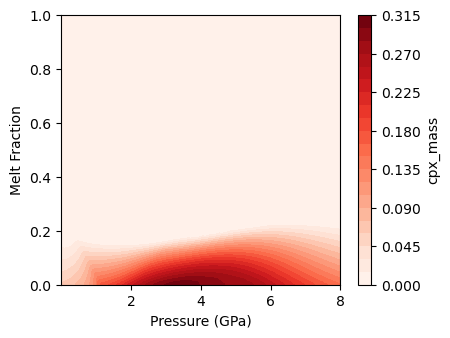

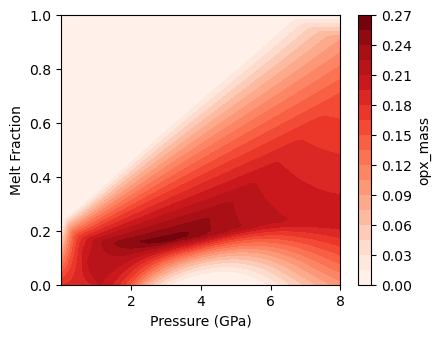

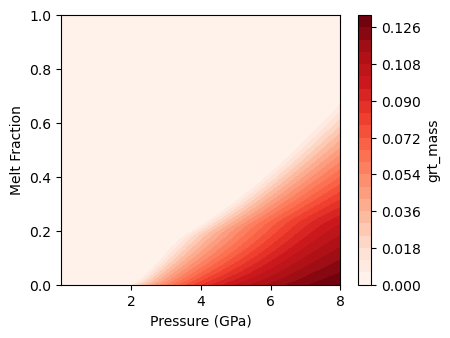

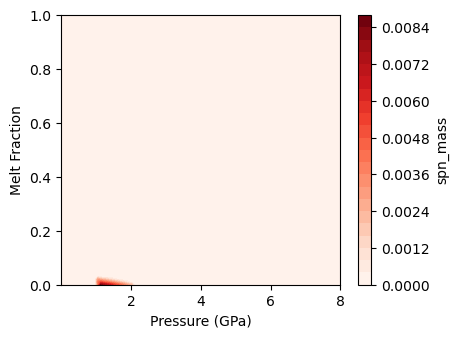

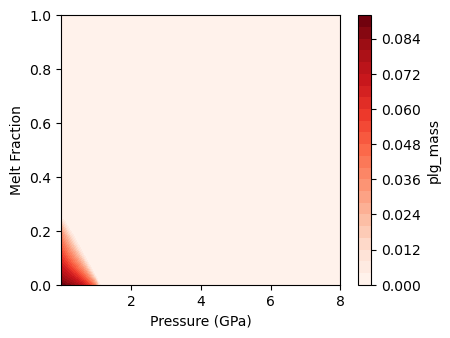

In [12]:
phases = ['olv', 'cpx', 'opx', 'grt', 'spn', 'plg']

for ph in phases:
    f, a = phasediagram.plot_TxSection(ph + '_mass', mask_mineral_out=False)
    plt.show()

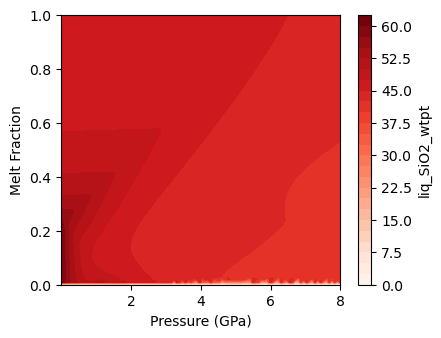

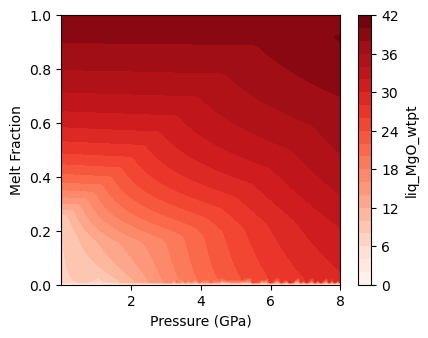

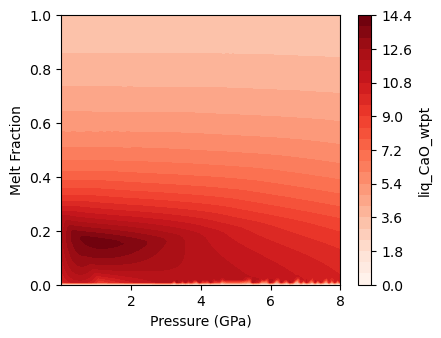

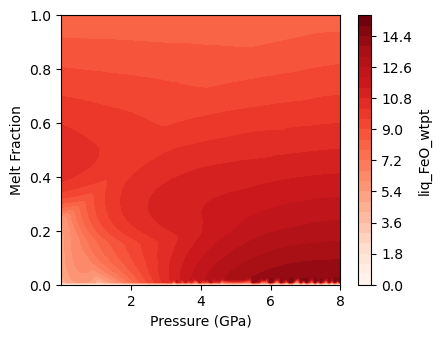

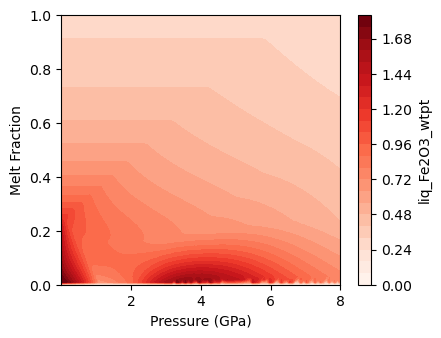

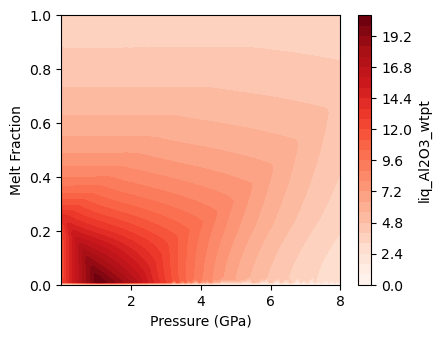

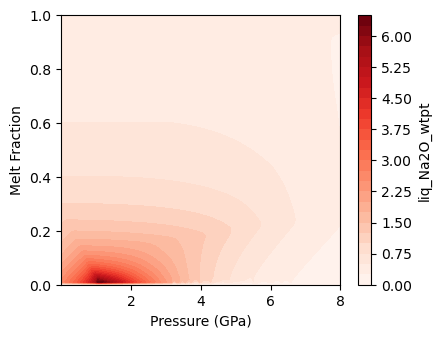

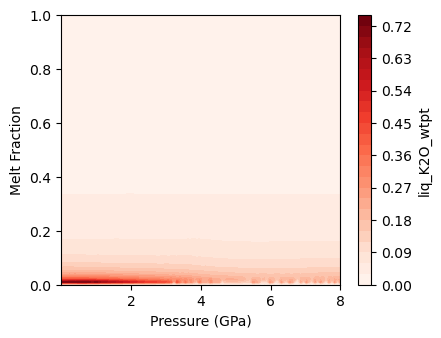

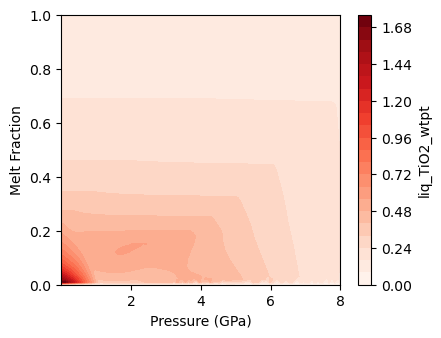

In [13]:
oxides = ['SiO2', 'MgO', 'CaO', 'FeO', 'Fe2O3', 'Al2O3', 'Na2O', 'K2O', 'TiO2']

for ox in oxides:
    f, a = phasediagram.plot_TxSection('liq_' + ox + '_wtpt')
    plt.show()
